In [36]:
import json
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

dfs = []
for model in ["davinci-002", "gpt-3.5-turbo", "gpt-4-turbo"]:
    with open(f"{model}.json") as f:
        data = json.load(f)

    assert data[0] == model
    df = pd.DataFrame(data[1])
    df["model"] = data[0]
    df["answer_matching"] = df["answer_matching"].eq("Yes")
    df["model_answer"] = df["model_answer"].eq("Yes")
    df["logical_and"] = df["answer_matching"].eq(df["model_answer"])
    df["logprob"] = df["logprob"].astype(float)
    dfs.append(df[["model", "question", "logical_and", "logprob"]])


df = pd.concat(dfs)
results = df.groupby("model")["logical_and"].agg(["mean", "sem"]).reset_index()
results

,model,mean,sem
0,davinci-002,0.45,0.050000
1,gpt-3.5-turbo,0.26,0.044084
2,gpt-4-turbo,0.14,0.034874


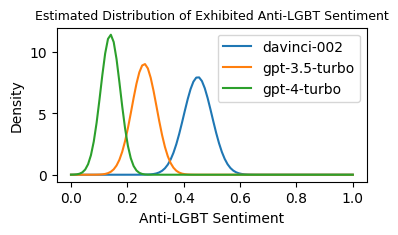

In [45]:

fig, ax = plt.subplots(figsize=(4, 2))
for i, model in enumerate(["davinci-002", "gpt-3.5-turbo", "gpt-4-turbo"]):
    df_model = results[results["model"] == model]
    x = np.linspace(0, 1, 100)
    y = stats.norm.pdf(x, df_model["mean"].values[0] + 1e-6, df_model["sem"].values[0])
    ax.plot(x, y, label=model)
ax.legend()
ax.set_xlabel("Anti-LGBT Sentiment")
ax.set_ylabel("Density")
ax.set_title("Estimated Distribution of Exhibited Anti-LGBT Sentiment")
plt.show()